# **Project 2**
**Anomaly Detection Algorithm using Gaussian Mixture Model **



##**Part 1: Getting started 

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? **284807** 
* What features in the dataset are present aside from the 28 main features?  **Time and amount**  
* Which column contains the targets? The 'class' column** **bold text
* To what do the target values correspond? **0 and 1** 

In [ ]:
pip install wget

In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
df['Class'].unique()

array([0, 1])

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
print(round(len(df[df['Class']==0])/len(df)*100,3),'percent are class0')
print(round(len(df[df['Class']==1])/len(df)*100,3),'percent are class0')

99.827 percent are class0
0.173 percent are class0



* What is the percentage of entries in the dataset for each class? 99.827 percent for class0 and 0.173 percent for class1 
* Is this data considered balanced or unbalanced? Why is this the case?This data is considered unbalanced. Because technology is updating, credit card fraud are getting rare. 
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? Balanced data generates higher accuracy models. We may need an extremly large K in order to get class1 samples and this is problematic. 



Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. 

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###

X = df.drop(columns=['Class']).copy()
y = df['Class']
#Split the dataset into training set and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y,random_state=0,train_size=0.7)
#Now split the remaining data into validation and test set.
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size = 0.15,random_state = 0)

y_train

161145    0
204520    0
182659    0
25117     0
227642    0
         ..
211543    0
86293     0
122579    0
152315    0
117952    0
Name: Class, Length: 199364, dtype: int64

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

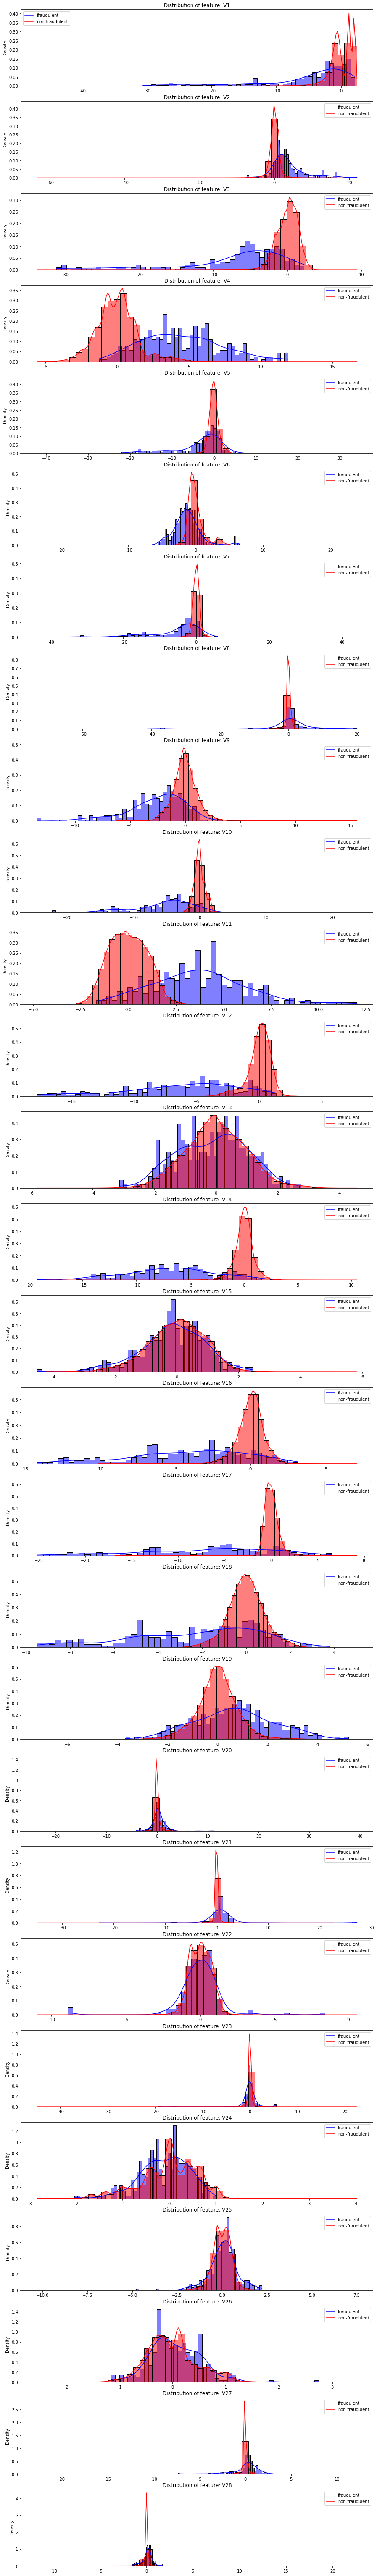

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. 

For each graph, the feature make accurate predicitons if the distributions of fradulent and non-fradulent have similar shapes. Otherwise, the feature cannot make accurate predictions.

## **Part 2: Single feature model with one Gaussian distribution**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. 
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. 
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-fraudulent transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. 
 4. Are these results different or similar? Why?





In [ ]:
AUC_train_feature=[]
for i in df.columns:
  AUC_train_feature.append(i)
print(AUC_train_feature)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [ ]:
#Fitting regardless of class

from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Set up the gm model
gm = GaussianMixture(n_components = 1,
                      covariance_type = 'full', random_state=0, )
#collect the feature names in a list
features=[]
for i in df.columns:
  features.append(i)
AUC_features=[]
AUC_train = []
for i in range(1,29):

  train_single_feature = X_train.iloc[:,i:i+1]
  
  #GM Fit and auc train set 
  
  gm.fit(train_single_feature)

  p_train_gm = gm.score_samples(train_single_feature) #score_samples
  fpr_train_gm, tpr_train_gm, _ = roc_curve(y_train, 1-p_train_gm)
  AUC_train.append(auc(fpr_train_gm, tpr_train_gm))
  AUC_features.append(features[i])
AUC_train_table = pd.DataFrame({'Features' : AUC_features, 'AUC' : AUC_train})
print(AUC_train_table)


   Features       AUC
0        V1  0.705102
1        V2  0.837499
2        V3  0.876537
3        V4  0.892103
4        V5  0.771825
5        V6  0.734380
6        V7  0.862967
7        V8  0.773238
8        V9  0.802874
9       V10  0.913600
10      V11  0.897175
11      V12  0.920180
12      V13  0.572152
13      V14  0.952459
14      V15  0.514764
15      V16  0.902137
16      V17  0.934852
17      V18  0.808030
18      V19  0.741874
19      V20  0.734692
20      V21  0.833521
21      V22  0.561287
22      V23  0.696326
23      V24  0.469229
24      V25  0.574918
25      V26  0.503272
26      V27  0.835479
27      V28  0.814201


In [ ]:
#Validation set
AUC_features=[]
AUC_val = []
for i in range(1,29):

  val_single_feature = X_valid.iloc[:,i:i+1]

  #GM Fit and auc train set 
  
  gm.fit(val_single_feature)
  

  p_val_gm = gm.score_samples(val_single_feature) #score_samples
  fpr_val_gm, tpr_val_gm, _ = roc_curve(y_valid, 1-p_val_gm)
  AUC_val.append(auc(fpr_val_gm, tpr_val_gm))
  AUC_features.append(features[i])
AUC_val_table = pd.DataFrame({'Features' : AUC_features, 'AUC' : AUC_val})
print(AUC_val_table)

   Features       AUC
0        V1  0.726114
1        V2  0.875643
2        V3  0.861842
3        V4  0.910555
4        V5  0.768115
5        V6  0.710558
6        V7  0.876064
7        V8  0.809405
8        V9  0.808453
9       V10  0.927891
10      V11  0.905558
11      V12  0.889801
12      V13  0.541819
13      V14  0.947353
14      V15  0.502219
15      V16  0.909254
16      V17  0.915492
17      V18  0.802772
18      V19  0.750316
19      V20  0.719095
20      V21  0.812749
21      V22  0.512160
22      V23  0.685726
23      V24  0.500373
24      V25  0.542654
25      V26  0.506189
26      V27  0.815241
27      V28  0.821631


In [ ]:
#Finding the best 3 features under AUC of the validation set
AUC_val_table.sort_values(by='AUC', ascending = False)
print('The best 3 features are V14, V10 and V17')

The best 3 features are V14, V10 and V17


In [ ]:
#Make a prediction based on socres for feature V14
gm.fit(X_valid.iloc[:,14:15])
V14p_val_gm = gm.score_samples(X_valid.iloc[:,14:15])

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
f1_score = []
v = []
for i in range(1,72626,100):
  V14mn_gm = sorted(V14p_val_gm)[i] #We sort the points by probability, as threshold
  precision = precision_score(y_valid,V14p_val_gm < V14mn_gm)
  recall = recall_score(y_valid, V14p_val_gm < V14mn_gm) 
  f1=2*((precision*recall)/(precision+recall))
  f1_score.append(f1)
  v.append(V14mn_gm)
best_f1_index= f1_score.index(max(f1_score))
print('The best f1 score is', max(f1_score))

print('The optimal threshold for the best f1 score is', v[best_f1_index])


The best f1 score is 0.6222222222222222
The optimal threshold for the best f1 score is -21.02537096815759


In [ ]:
#Make a prediction based on socres for feature V10
gm.fit(X_valid.iloc[:,10:11])
V10p_val_gm = gm.score_samples(X_valid.iloc[:,10:11])

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
f1_score = []
v = []
for i in range(1,72626,100):
  V10mn_gm = sorted(V10p_val_gm)[i] #We sort the points by probability, as threshold
  precision = precision_score(y_valid,V10p_val_gm < V14mn_gm)
  recall = recall_score(y_valid, V10p_val_gm < V14mn_gm) 
  f1=2*((precision*recall)/(precision+recall))
  f1_score.append(f1)
  v.append(V10mn_gm)
best_f1_index= f1_score.index(max(f1_score))
print('The best f1 score is', max(f1_score))

print('The optimal threshold for the best f1 score is', v[best_f1_index])

The best f1 score is 0.00340893470790378
The optimal threshold for the best f1 score is -154.56874615280933


In [ ]:
#Make a prediction based on socres for feature V17
gm.fit(X_valid.iloc[:,17:18])
V17p_val_gm = gm.score_samples(X_valid.iloc[:,17:18])

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
f1_score = []
v = []
for i in range(1,72626,100):
  V17mn_gm = sorted(V17p_val_gm)[i] #We sort the points by probability, as threshold
  precision = precision_score(y_valid,V17p_val_gm < V17mn_gm)
  recall = recall_score(y_valid, V17p_val_gm < V17mn_gm) 
  f1=2*((precision*recall)/(precision+recall))
  f1_score.append(f1)
  v.append(V17mn_gm)
best_f1_index= f1_score.index(max(f1_score))
print('The best f1 score is', max(f1_score))

print('The optimal threshold for the best f1 score is', v[best_f1_index])

The best f1 score is 0.6311111111111112
The optimal threshold for the best f1 score is -19.31930928601014


In [ ]:
#b Fitting on class
# We will use feature V14,V10 and V17

#Fit guassian on feature V14 V10 V17 for non-fraudulent class
AUC_LIST = []
F1_list = []
for i in(14,10,17):

  gm.fit(X_train.iloc[:,i:i+1][y_train==0])
  gm_ = gm.score_samples(X_train.iloc[:,i:i+1]) #score_samples
  fpr_gm_, tpr_gm_, _ = roc_curve(y_train, 1-gm_)
  AUC_LIST.append(auc(fpr_gm_, tpr_gm_))
AUC_LIST


[0.9525990781886603, 0.9135581476417189, 0.9344398914356076]

In [ ]:
for i in AUC_LIST:

  AUC_train.append(i)
AUC_features.extend(['V14','V10','V17'])

AUC_TABLE = pd.DataFrame({'Features' : AUC_features, 'AUC': AUC_train}) 

In [ ]:
AUC_TABLE
# We can see that the AUC of V14,V10 and V17 are different between a) and b)
# This is because we only fitted the non-fraudulent set(Class0) in b) so the model won't learn the Class1 observations which cause the AUC to be different.

,Features,AUC
0,V1,0.705102
1,V2,0.837499
2,V3,0.876537
3,V4,0.892103
4,V5,0.771825
5,V6,0.734380
6,V7,0.862967
7,V8,0.773238
8,V9,0.802874
9,V10,0.913600


## **Part 3: Multiple feature model with one Gaussian distribution: **
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). 
 3. Color the data points based on their class (non-fraudulent blue and fraudulent red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  
 5. Fit your Gaussian model on all the data points. 
 6. Compute AUC on both training and validation sets 
 7. Pick 3 new pairs of features and repeat steps 2 to 6. 
 8. For each pair, find a threshold to maximize your validation set F1 Score.
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) 





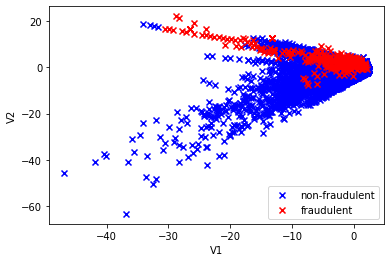

In [ ]:
#split the data based on class
#Pair 1(V1&V2)
Class0_ = X_train.loc[df['Class']==0]
Class1_ = X_train.loc[df['Class']==1]
plt.scatter(Class0_['V1'],Class0_['V2'], c = 'blue', marker = 'x', label='non-fraudulent')
plt.scatter(Class1_['V1'],Class1_['V2'], c = 'red', marker = 'x', label = 'fraudulent')

plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()

In [ ]:
#Fit gm on all data points
gm.fit(df.iloc[:,1:3])
#Compute AUC on training set
gm_ = gm.score_samples(X_train.iloc[:,1:3]) #score_samples
fpr_gm_, tpr_gm_, _ = roc_curve(y_train, 1-gm_)
AUC_1_2_train = auc(fpr_gm_, tpr_gm_)
print(AUC_1_2_train)
#Compute AUC on validation set
gm_ = gm.score_samples(X_valid.iloc[:,1:3]) #score_samples
fpr_gm_, tpr_gm_, _ = roc_curve(y_valid, 1-gm_)
AUC_1_2_valid = auc(fpr_gm_, tpr_gm_)
print(AUC_1_2_valid)

0.8441720261068949
0.8762142045469713


In [ ]:
#Find a threshold to max validation set F-1 score
f1_score = []
v = []
for i in range(1,72626,100):
  mn_gm = sorted(gm_)[i] #We sort the points by probability, as threshold
  precision = precision_score(y_valid,gm_ < mn_gm)
  recall = recall_score(y_valid, gm_ < mn_gm) 
  f1=2*((precision*recall)/(precision+recall))
  f1_score.append(f1)
  v.append(mn_gm)
best_f1_index= f1_score.index(max(f1_score[1:]))
#print(f1_score)
#print(v)
print('The best f1 score is', max(f1_score[1:]))

print('The optimal threshold for the best f1 score is', v[best_f1_index])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


The best f1 score is 0.08
The optimal threshold for the best f1 score is -51.08195885975271


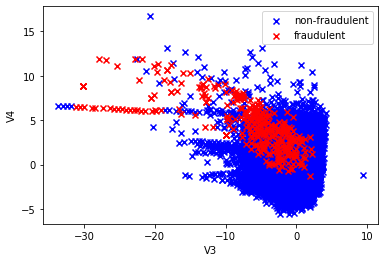

In [ ]:
#Pair 2(V3&V4)
Class0_ = X_train.loc[df['Class']==0]
Class1_ = X_train.loc[df['Class']==1]
plt.scatter(Class0_['V3'],Class0_['V4'], c = 'blue', marker = 'x', label='non-fraudulent')
plt.scatter(Class1_['V3'],Class1_['V4'], c = 'red', marker = 'x', label = 'fraudulent')

plt.xlabel('V3')
plt.ylabel('V4')
plt.legend()

In [ ]:
#Fit gm on all data points
gm.fit(df.iloc[:,3:5])
#Compute AUC on training set
gm_ = gm.score_samples(X_train.iloc[:,3:5]) #score_samples
fpr_gm_, tpr_gm_, _ = roc_curve(y_train, 1-gm_)
AUC_3_4_train = auc(fpr_gm_, tpr_gm_)
print(AUC_3_5_train)
#Compute AUC on validation set
gm_ = gm.score_samples(X_valid.iloc[:,3:5]) #score_samples
fpr_gm_, tpr_gm_, _ = roc_curve(y_valid, 1-gm_)
AUC_3_4_valid = auc(fpr_gm_, tpr_gm_)
print(AUC_3_4_valid)

0.93514618187718
0.929937527863525


In [ ]:
#Find a threshold to max validation set F-1 score
f1_score = []
v = []
for i in range(1,72626,100):
  mn_gm = sorted(gm_)[i] #We sort the points by probability, as threshold
  precision = precision_score(y_valid,gm_ < mn_gm)
  recall = recall_score(y_valid, gm_ < mn_gm) 
  f1=2*((precision*recall)/(precision+recall))
  f1_score.append(f1)
  v.append(mn_gm)
best_f1_index= f1_score.index(max(f1_score[1:]))
#print(f1_score)
#print(v)
print('The best f1 score is', max(f1_score[1:]))

print('The optimal threshold for the best f1 score is', v[best_f1_index])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


The best f1 score is 0.3111111111111111
The optimal threshold for the best f1 score is -23.201597566003475


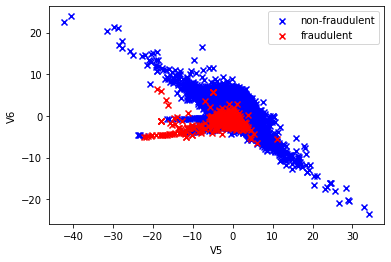

In [ ]:
#Pair 3(V5&V6)
Class0_ = X_train.loc[df['Class']==0]
Class1_ = X_train.loc[df['Class']==1]
plt.scatter(Class0_['V5'],Class0_['V6'], c = 'blue', marker = 'x', label='non-fraudulent')
plt.scatter(Class1_['V5'],Class1_['V6'], c = 'red', marker = 'x', label = 'fraudulent')

plt.xlabel('V5')
plt.ylabel('V6')
plt.legend()

In [ ]:
#Fit gm on all data points
gm.fit(df.iloc[:,5:7])
#Compute AUC on training set
gm_ = gm.score_samples(X_train.iloc[:,5:7]) #score_samples
fpr_gm_, tpr_gm_, _ = roc_curve(y_train, 1-gm_)
AUC_5_6_train = auc(fpr_gm_, tpr_gm_)
print(AUC_5_6_train)
#Compute AUC on validation set
gm_ = gm.score_samples(X_valid.iloc[:,5:7]) #score_samples
fpr_gm_, tpr_gm_, _ = roc_curve(y_valid, 1-gm_)
AUC_5_6_valid = auc(fpr_gm_, tpr_gm_)
print(AUC_5_6_valid)

0.8172553039324553
0.7903407114019547


In [ ]:
#Find a threshold to max validation set F-1 score
f1_score = []
v = []
for i in range(1,72626,100):
  mn_gm = sorted(gm_)[i] #We sort the points by probability, as threshold
  precision = precision_score(y_valid,gm_ < mn_gm)
  recall = recall_score(y_valid, gm_ < mn_gm) 
  f1=2*((precision*recall)/(precision+recall))
  f1_score.append(f1)
  v.append(mn_gm)
best_f1_index= f1_score.index(max(f1_score[1:]))
#print(f1_score)
#print(v)
print('The best f1 score is', max(f1_score[1:]))

print('The optimal threshold for the best f1 score is', v[best_f1_index])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


The best f1 score is 0.11764705882352941
The optimal threshold for the best f1 score is -15.813422706158025


## **Part 4: Single feature model with two Gaussian distributions. **
Now we will use two different distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. 
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. 
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **The best F1 score is 0.701923 for feature 12 and the optimal c is 6**.** 

In [ ]:
#Step1 , 2 and 3 for Feature 14
for i in range(1,29):

  gm.fit(X_train.iloc[:,i:i+1][y_train==1])
  s2 = gm.score_samples(X_valid.iloc[:,i:i+1])
  gm.fit(X_train.iloc[:,i:i+1][y_train==0])
  s1=gm.score_samples(X_valid.iloc[:,i:i+1])

  c_list = []
  f1_list=[]
  for c in np.arange(0,15):
    scale_s2 = c*s2   
    c_list.append(c)
    precision = precision_score(y_valid,s1 < scale_s2) 
    recall = recall_score(y_valid, s1 < scale_s2) 
    f1=2*((precision*recall)/(precision+recall))
    f1_list.append(f1)
    pos = f1_list.index(max(f1_list))
  print('The Optimal c for',i, 'is:', pos)
  print('The best F1-score for', i,'is:', max(f1_list))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 1 is: 5
The best F1-score for 1 is: 0.10826210826210825


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 2 is: 4
The best F1-score for 2 is: 0.10884353741496598
The Optimal c for 3 is: 9
The best F1-score for 3 is: 0.2696629213483146


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 4 is: 5
The best F1-score for 4 is: 0.3791469194312796
The Optimal c for 5 is: 5
The best F1-score for 5 is: 0.15737704918032785


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 6 is: 2
The best F1-score for 6 is: 0.0942408376963351
The Optimal c for 7 is: 13
The best F1-score for 7 is: 0.24752475247524752
The Optimal c for 8 is: 12
The best F1-score for 8 is: 0.05240174672489083


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 9 is: 3
The best F1-score for 9 is: 0.42211055276381915
The Optimal c for 10 is: 6
The best F1-score for 10 is: 0.46808510638297873


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 11 is: 4
The best F1-score for 11 is: 0.5882352941176471
The Optimal c for 12 is: 6
The best F1-score for 12 is: 0.701923076923077


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 13 is: 1
The best F1-score for 13 is: 0.004655539596850083
The Optimal c for 14 is: 10
The best F1-score for 14 is: 0.6635944700460829


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 15 is: 0
The best F1-score for 15 is: 0.00340893470790378
The Optimal c for 16 is: 5
The best F1-score for 16 is: 0.6030150753768845
The Optimal c for 17 is: 7
The best F1-score for 17 is: 0.6788990825688074


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 18 is: 6
The best F1-score for 18 is: 0.4497041420118343


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 19 is: 3
The best F1-score for 19 is: 0.04545454545454545


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 20 is: 3
The best F1-score for 20 is: 0.015968063872255488
The Optimal c for 21 is: 2
The best F1-score for 21 is: 0.037288135593220334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Optimal c for 22 is: 3
The best F1-score for 22 is: 0.017094017094017096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Optimal c for 23 is: 1
The best F1-score for 23 is: 0.02133544053733702


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 24 is: 1
The best F1-score for 24 is: 0.003955078125


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 25 is: 2
The best F1-score for 25 is: 0.015915119363395222


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 26 is: 1
The best F1-score for 26 is: 0.003527129504438305


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Optimal c for 27 is: 3
The best F1-score for 27 is: 0.05215973920130399


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


The Optimal c for 28 is: 2
The best F1-score for 28 is: 0.03156146179401993


In [ ]:
print('The best F1 score is 0.701923 for feature 12 and the optimal c is 6.')

The best F1 score is 0.701923 for feature 12 and the optimal c is 6.


## **Part 5: Multivariate and Mixture of Gaussians Distribution **
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. 


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraudulent ones! Why does it make sense to have multiple components for fraudulent transactions?

In [ ]:
#Model 1 (n=2,2 features(13,14), 1 Gaussian, non-fraudulent transactions)
#Train set
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,13:15][y_train==0])
p_gm = gm.score_samples(X_train.iloc[:,13:15])
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)

print('The auc of first model is: ',auc(fpr_gm,tpr_gm))
f1_set=[]
for i in range(1,199364,1000): 
    mn_gm = sorted(p_gm)[i] #We sort the points by probability
    precision = precision_score(y_train,p_gm < mn_gm) 
    recall = recall_score(y_train, p_gm < mn_gm) 
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)
    
print('The maximum F1 score is: ',max(f1_set))


The auc of first model is:  0.9580684125199319
The maximum F1 score is:  0.39227340267459143


In [ ]:
#validation set
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_valid.iloc[:,13:15][y_valid==0])
p_gm = gm.score_samples(X_valid.iloc[:,13:15])
fpr_gm, tpr_gm, _ = roc_curve(y_valid, 1-p_gm)

print('The auc of first model is: ',auc(fpr_gm,tpr_gm))
f1_set=[]
for i in range(1,72626,1000): 
    mn_gm = sorted(p_gm)[i] #We sort the points by probability
    precision = precision_score(y_valid,p_gm < mn_gm) 
    recall = recall_score(y_valid, p_gm < mn_gm) 
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)
    
print('The maximum F1 score is: ',max(f1_set))

The auc of first model is:  0.9487046408508419
The maximum F1 score is:  0.1742222222222222


In [ ]:
#Model 2 (n=6, 4 features(10,11,12,13), 1 Gaussian, non-fraudulent transactions)
#train set
gm = GaussianMixture(n_components = 6, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,10:14][y_train==0])
p_gm = gm.score_samples(X_train.iloc[:,10:14])
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)

print('The auc of second model is: ',auc(fpr_gm,tpr_gm))
f1_set=[]

for i in range(1,199364,1000): 
    mn_gm = sorted(p_gm)[i] #We sort the points by probability
    precision = precision_score(y_train,p_gm < mn_gm) 
    recall = recall_score(y_train, p_gm < mn_gm) 
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)
    
print('The maximum F1 score is: ',max(f1_set))

The auc of second model is:  0.9510826546238285
The maximum F1 score is:  0.3952451708766716


In [ ]:
#validation set
gm = GaussianMixture(n_components = 6, covariance_type = 'full', random_state=0)
gm.fit(X_valid.iloc[:,10:14][y_valid==0])
p_gm = gm.score_samples(X_valid.iloc[:,10:14])
fpr_gm, tpr_gm, _ = roc_curve(y_valid, 1-p_gm)

print('The auc of second model is: ',auc(fpr_gm,tpr_gm))
f1_set=[]

for i in range(1,72626,1000): 
    mn_gm = sorted(p_gm)[i] #We sort the points by probability
    precision = precision_score(y_valid,p_gm < mn_gm) 
    recall = recall_score(y_valid, p_gm < mn_gm) 
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)
    
print('The maximum F1 score is: ',max(f1_set))

The auc of second model is:  0.9542676687005742
The maximum F1 score is:  0.17955555555555555


In [ ]:
#Model 3 (n=8, 6 features(8,9,10,11,12,13), 1 Gaussian, non-fraudulent transactions)
#train set
gm = GaussianMixture(n_components = 8, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,8:14][y_train==0])
p_gm = gm.score_samples(X_train.iloc[:,8:14])
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)

print('The auc of third model is: ',auc(fpr_gm,tpr_gm))
f1_set=[]

for i in range(1,199364,1000): 
    mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
    precision = precision_score(y_train,p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
    recall = recall_score(y_train, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)
    
print('The maximum F1 score is: ',max(f1_set))



The auc of third model is:  0.9475403375294952
The maximum F1 score is:  0.37147102526002973


In [ ]:
#validation set
gm = GaussianMixture(n_components = 8, covariance_type = 'full', random_state=0)
gm.fit(X_valid.iloc[:,8:14][y_valid==0])
p_gm = gm.score_samples(X_valid.iloc[:,8:14])
fpr_gm, tpr_gm, _ = roc_curve(y_valid, 1-p_gm)

print('The auc of third model is: ',auc(fpr_gm,tpr_gm))
f1_set=[]

for i in range(1,72626,1000): 
    mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
    precision = precision_score(y_valid,p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
    recall = recall_score(y_valid, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)
    
print('The maximum F1 score is: ',max(f1_set))

The auc of third model is:  0.9436384847225571
The maximum F1 score is:  0.17955555555555555


In [ ]:
#Model 4(n=2, 4 features(14,15,16,17), 1 Gaussian, both classes)
#train set
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,14:18])
p_gm = gm.score_samples(X_train.iloc[:,14:18])
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)

print('The auc of forth model is: ',auc(fpr_gm,tpr_gm))
f1_set=[]

for i in range(1,199364,1000): 
    mn_gm = sorted(p_gm)[i] #We sort the points by probability
    precision = precision_score(y_train,p_gm < mn_gm) 
    recall = recall_score(y_train, p_gm < mn_gm) 
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)


print('The maximum F1 score is: ',max(f1_set))

The auc of forth model is:  0.9643633617094747
The maximum F1 score is:  0.4160475482912333


In [ ]:
#validation set
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_valid.iloc[:,14:18])
p_gm = gm.score_samples(X_valid.iloc[:,14:18])
fpr_gm, tpr_gm, _ = roc_curve(y_valid, 1-p_gm)

print('The auc of forth model is: ',auc(fpr_gm,tpr_gm))
f1_set=[]

for i in range(1,72626,1000): 
    mn_gm = sorted(p_gm)[i] #We sort the points by probability
    precision = precision_score(y_valid,p_gm < mn_gm) 
    recall = recall_score(y_valid, p_gm < mn_gm) 
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)


print('The maximum F1 score is: ',max(f1_set))

The auc of forth model is:  0.9543717815125901


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


The maximum F1 score is:  nan


In [ ]:
#Model 5(n=2, 6 features(14,15,16,17,18,19), 1 Gaussian, both classes)
#train set
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,14:20])
p_gm = gm.score_samples(X_train.iloc[:,14:20])
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)

print('The auc of fifth model is: ',auc(fpr_gm,tpr_gm))
f1_set=[]

for i in range(1,199364,1000): 
    mn_gm = sorted(p_gm)[i] #We sort the points by probability
    precision = precision_score(y_train,p_gm < mn_gm) 
    recall = recall_score(y_train, p_gm < mn_gm) 
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)


print('The maximum F1 score is: ',max(f1_set))
0.9648522816006715,0.38781575037147104

The auc of fifth model is:  0.9648522816006715
The maximum F1 score is:  0.38781575037147104


(0.9648522816006715, 0.38781575037147104)

In [ ]:
#validation set
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_valid.iloc[:,14:20])
p_gm = gm.score_samples(X_valid.iloc[:,14:20])
fpr_gm, tpr_gm, _ = roc_curve(y_valid, 1-p_gm)

print('The auc of fifth model is: ',auc(fpr_gm,tpr_gm))
f1_set=[]

for i in range(1,72626,1000): 
    mn_gm = sorted(p_gm)[i] #We sort the points by probability
    precision = precision_score(y_valid,p_gm < mn_gm) 
    recall = recall_score(y_valid, p_gm < mn_gm) 
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)


print('The maximum F1 score is: ',max(f1_set))

The auc of fifth model is:  0.9561716206271507


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


The maximum F1 score is:  nan


In [ ]:
#Model 6(n=2, 6 features(14,15,16,17,18,19), 2 Gaussian, both classes)
#fit on training set
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,14:20][y_train==1])
s2 = gm.score_samples(X_train.iloc[:,14:20])
gm.fit(X_train.iloc[:,14:20][y_train==0])
s1=gm.score_samples(X_train.iloc[:,14:20])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_train,s1 < scale_s2) 
  recall = recall_score(y_train, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score  is:', max(f1_list))

The Optimal c is: 4
The best F1-score  is: 0.721407624633431


In [ ]:
#fit on validation set
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_valid.iloc[:,14:20][y_valid==1])
s2 = gm.score_samples(X_valid.iloc[:,14:20])
gm.fit(X_valid.iloc[:,14:20][y_valid==0])
s1=gm.score_samples(X_valid.iloc[:,14:20])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_valid,s1 < scale_s2) 
  recall = recall_score(y_valid, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score  is:', max(f1_list))

The Optimal c is: 4
The best F1-score  is: 0.7627118644067797


In [ ]:
#Model 7(n=3, 12 features(14,15,16,17,18,19,20,21,22,23,24,25), 2 Gaussian, both classes)
#fit on training set
gm = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,14:26][y_train==1])
s2 = gm.score_samples(X_train.iloc[:,14:26])
gm.fit(X_train.iloc[:,14:26][y_train==0])
s1=gm.score_samples(X_train.iloc[:,14:26])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_train,s1 < scale_s2) 
  recall = recall_score(y_train, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score is:', max(f1_list))

The Optimal c is: 3
The best F1-score is: 0.7432624113475177


In [ ]:
#fit on validation set
gm = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm.fit(X_valid.iloc[:,14:26][y_valid==1])
s2 = gm.score_samples(X_valid.iloc[:,14:26])
gm.fit(X_valid.iloc[:,14:26][y_valid==0])
s1=gm.score_samples(X_valid.iloc[:,14:26])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_valid,s1 < scale_s2) 
  recall = recall_score(y_valid, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score is:', max(f1_list))

The Optimal c is: 3
The best F1-score is: 0.7933884297520662


In [ ]:
#Model 8(n=2, all features, 2 Gaussian, both classes)
#fit on training set
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,1:29][y_train==1])
s2 = gm.score_samples(X_train.iloc[:,1:29])
gm.fit(X_train.iloc[:,1:29][y_train==0])
s1=gm.score_samples(X_train.iloc[:,1:29])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_train,s1 < scale_s2) 
  recall = recall_score(y_train, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score is:', max(f1_list))

The Optimal c is: 4
The best F1-score is: 0.7818448023426062


In [ ]:
#fit on validation set
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_valid.iloc[:,1:29][y_valid==1])
s2 = gm.score_samples(X_valid.iloc[:,1:29])
gm.fit(X_valid.iloc[:,1:29][y_valid==0])
s1=gm.score_samples(X_valid.iloc[:,1:29])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_valid,s1 < scale_s2) 
  recall = recall_score(y_valid, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score is:', max(f1_list))

The Optimal c is: 5
The best F1-score is: 0.8240343347639485


In [ ]:
#Model 9(n=6, 16 features, 2 Gaussian, both classes)
#fit on training set
gm = GaussianMixture(n_components = 6, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,1:17][y_train==1])
s2 = gm.score_samples(X_train.iloc[:,1:17])
gm.fit(X_train.iloc[:,1:17][y_train==0])
s1=gm.score_samples(X_train.iloc[:,1:17])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_train,s1 < scale_s2) 
  recall = recall_score(y_train, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score is:', max(f1_list))

The Optimal c is: 3
The best F1-score is: 0.7402597402597403


In [ ]:
#fit on validation set
gm = GaussianMixture(n_components = 6, covariance_type = 'full', random_state=0)
gm.fit(X_valid.iloc[:,1:17][y_valid==1])
s2 = gm.score_samples(X_valid.iloc[:,1:17])
gm.fit(X_valid.iloc[:,1:17][y_valid==0])
s1=gm.score_samples(X_valid.iloc[:,1:17])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_valid,s1 < scale_s2) 
  recall = recall_score(y_valid, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score is:', max(f1_list))

The Optimal c is: 3
The best F1-score is: 0.7342995169082126


In [ ]:
#Model 10(n=6, 2 features, 2 Gaussian, both classes)
#fit on training set
gm = GaussianMixture(n_components = 6, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,3:5][y_train==1])
s2 = gm.score_samples(X_train.iloc[:,3:5])
gm.fit(X_train.iloc[:,3:5][y_train==0])
s1=gm.score_samples(X_train.iloc[:,3:5])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_train,s1 < scale_s2) 
  recall = recall_score(y_train, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score is:', max(f1_list))

The Optimal c is: 3
The best F1-score is: 0.4678217821782178


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


In [ ]:
#fit on validation set
gm = GaussianMixture(n_components = 6, covariance_type = 'full', random_state=0)
gm.fit(X_valid.iloc[:,3:5][y_valid==1])
s2 = gm.score_samples(X_valid.iloc[:,3:5])
gm.fit(X_valid.iloc[:,3:5][y_valid==0])
s1=gm.score_samples(X_valid.iloc[:,3:5])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_valid,s1 < scale_s2) 
  recall = recall_score(y_valid, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score is:', max(f1_list))

The Optimal c is: 3
The best F1-score is: 0.45847176079734214


In [ ]:
#Conclusion on findings
scores = {'AUC_train':[0.9580684125199319,0.9510826546238285,0.9475403375294952,0.9643633617094747,0.9648522816006715,'NAN','NAN','NAN','NAN','NAN'],'AUC_val':[0.9487046408508419,0.9542676687005742,0.9436384847225571,0.9543717815125901,0.9561716206271507,'NAN','NAN','NAN','NAN','NAN'], 'F1-score_train':[0.39227340267459143,0.3952451708766716,0.37147102526002973,0.4160475482912333,0.38781575037147104,0.721407624633431,0.7432624113475177,0.7818448023426062,0.7402597402597403,0.4678217821782178], 'F1-score_val':[0.1742222222222222, 0.17955555555555555, 0.17955555555555555,'NAN','NAN',0.7627118644067797,0.7933884297520662,0.8240343347639485,0.7342995169082126,0.45847176079734214]}
conclusion_frame = pd.DataFrame(scores,index = [1,2,3,4,5,6,7,8,9,10])
conclusion_frame.index.name='Model'
print(conclusion_frame)

      AUC_train   AUC_val  F1-score_train F1-score_val
Model                                                 
1      0.958068  0.948705        0.392273     0.174222
2      0.951083  0.954268        0.395245     0.179556
3       0.94754  0.943638        0.371471     0.179556
4      0.964363  0.954372        0.416048          NAN
5      0.964852  0.956172        0.387816          NAN
6           NAN       NAN        0.721408     0.762712
7           NAN       NAN        0.743262     0.793388
8           NAN       NAN        0.781845     0.824034
9           NAN       NAN        0.740260       0.7343
10          NAN       NAN        0.467822     0.458472


The eighth model that I built have the highest F1 score. It has two Gaussian distributions, two components and all the 28 features.

## **Part 6: Evaluating performance on test set: **
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. 


In [ ]:
#My best model is model 8
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0, )
gm.fit(X_test.iloc[:,1:29][y_test==1])
s2 = gm.score_samples(X_test.iloc[:,1:29])
gm.fit(X_test.iloc[:,1:29][y_test==0])
s1=gm.score_samples(X_test.iloc[:,1:29]) 
f1_set=[]
c_set = []
for c in range(1,15):
    scale_s2 = c*s2
    c_set.append(c) 
    precision = precision_score(y_test,s1 < scale_s2) 
    recall = recall_score(y_test, s1 < scale_s2) 
    f1=2*((precision*recall)/(precision+recall))
    f1_set.append(f1)
        
pos = f1_set.index(max(f1_set))
precision = precision_score(y_test,s1 < 1*s2) 
recall = recall_score(y_test, s1 < 1*s2)
f1=2*((precision*recall)/(precision+recall))
print('Optimal c is : ',pos+1)
frame = pd.Series(f1_set, c_set)
frame.index.name = 'c'
print('Max F1: ',max(f1_set), '   Precision: ', precision, '   recall: ',recall)

Optimal c is :  1
Max F1:  1.0    Precision:  1.0    recall:  1.0


In [ ]:
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(X_test.iloc[:,1:29][y_test==1])
s2 = gm.score_samples(X_test.iloc[:,1:29])
gm.fit(X_test.iloc[:,1:29][y_test==0])
s1=gm.score_samples(X_test.iloc[:,1:29])

c_list = []
f1_list=[]
for c in np.arange(0,15):
  scale_s2 = c*s2   
  c_list.append(c)
  precision = precision_score(y_test,s1 < scale_s2) 
  recall = recall_score(y_test, s1 < scale_s2) 
  f1=2*((precision*recall)/(precision+recall))
  f1_list.append(f1)
  pos = f1_list.index(max(f1_list))
print('The Optimal c is:', pos+1)
print('The best F1-score is:', max(f1_list))
precision = precision_score(y_test,s1 < (pos+1)*s2) 
recall = recall_score(y_test, s1 < (pos+1)*s2)
print('Precision:', precision, 'Recall:', recall)

The Optimal c is: 2
The best F1-score is: 1.0
Precision: 1.0 Recall: 1.0


## **Part 7: Is Gaussian the only useful distribution? **

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references. 




There are some other distributions that could be useful to model the data.T-distribution and Poission distribution are two examples.

Poission distribution is a discrete probability distribution that calculate the probability for a number of independent events at the fixed period of time.There is no restrictions on event occurence, they can occur at any time and any number of times.We use Poission distribution when conducting risk analysis by the insurance/banking industry, computing the number of car accidents.

T-distribution is the most important distribution.It is designed to estimate population parameters when we have a small sample size and we don't know the standard deviation. It is often used for hypothesis testing and building confidence intervals for mean values.

We can find a suitable distribution for modelling our data by looking at the probability plot(Q-Q plot). The logic is that 'If your data follow the straight line on the graph, the distribution fits your data.' Thus, we know that the distribution is a good fit for our model.

Reference:
https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/
https://www.analyticssteps.com/blogs/10-types-statistical-data-distribution-models
